<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

#primera parte de la actividad


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

1. La librearia sympy.

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
def pot_escalado(z, R= 0.1):
  return z / np.sqrt(z**2 + R**2)

In [ ]:
z = sp.symbols('z')
R = sp.symbols('R')

In [ ]:
def pot_escalado_sp(z, R= 0.1):
  return z / sp.sqrt(z**2 + R**2)

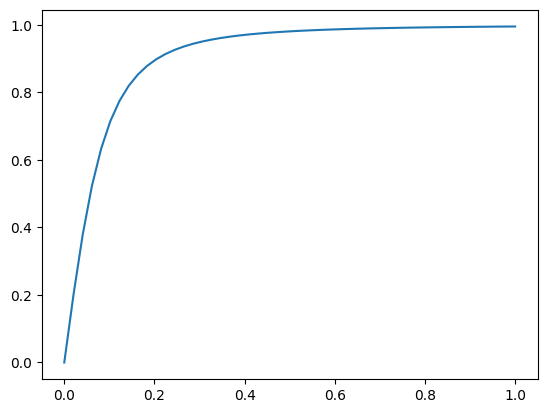

In [ ]:
x=  np.linspace(0,1)

plt.plot(x, pot_escalado(x));

In [ ]:
derivada = sp.diff(pot_escalado_sp(z, R), z)
derivada

-z**2/(R**2 + z**2)**(3/2) + 1/sqrt(R**2 + z**2)

In [ ]:
der = sp.lambdify((z, R), derivada, 'numpy')
der

<function _lambdifygenerated(z, R)>

In [ ]:
R= 0.1

In [ ]:
#der(2, R)

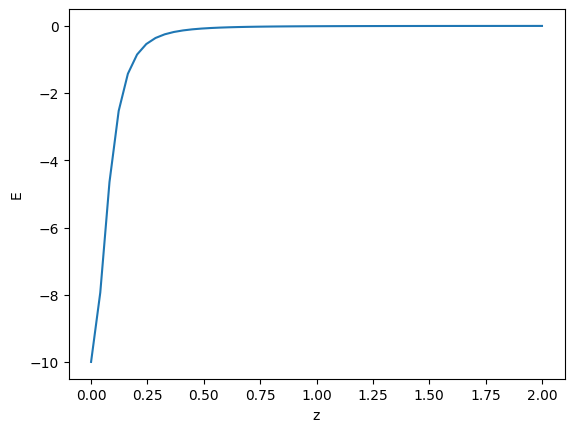

In [ ]:
#ya que tenemos la derivada, obtenemos el valor del campo eléctrico
#el campo electrico es menos el gradiente del potencial


z = np.linspace(0, 2)
E = -1 * der(z, R=0.1)

plt.plot(z, E)
plt.xlabel('z')
plt.ylabel('E');

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)


- esta me permite encontrar solamente la derivada en un punto.
- dx es la resoucion que yo desee en el eje x, pues se trata de que ya tengo uan función

In [ ]:
from scipy.misc import derivative

In [ ]:
#derivative?

In [ ]:
def pot_escalado(z, R= 0.1):
  return z / np.sqrt(z**2 + R**2)

In [ ]:
R = 0.1

In [ ]:
derivative(pot_escalado, 0.1, dx = 1, args=(R,))

<ipython-input-66-415265bcaff3>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(pot_escalado, 0.1, dx = 1, args=(R,))


0.9948884705706614

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

In [ ]:
#veamos ahora el derivative para diferentes puntos por medio de un for

z= np.linspace(0,2, 100)
derivadas = []

for i in z:
  val = derivative(pot_escalado, i, dx = 0.001, args=(R,))
  derivadas.append(val)

derivadas


In [ ]:
derivs = np.array(derivadas)
campo_e = -derivs

campo_e

array([-9.99950004e+00, -9.41726280e+00, -7.97050055e+00, -6.25468183e+00,
       -4.70549873e+00, -3.48250132e+00, -2.57734754e+00, -1.92477212e+00,
       -1.45679356e+00, -1.11927238e+00, -8.73094752e-01, -6.91069080e-01,
       -5.54518971e-01, -4.50603939e-01, -3.70427850e-01, -3.07758975e-01,
       -2.58176822e-01, -2.18504412e-01, -1.86428506e-01, -1.60243300e-01,
       -1.38675541e-01, -1.20763820e-01, -1.05774235e-01, -9.31407754e-02,
       -8.24226798e-02, -7.32735914e-02, -6.54190100e-02, -5.86396352e-02,
       -5.27589421e-02, -4.76338274e-02, -4.31475050e-02, -3.92040644e-02,
       -3.57242699e-02, -3.26422932e-02, -2.99031532e-02, -2.74606975e-02,
       -2.52759990e-02, -2.33160760e-02, -2.15528636e-02, -1.99623828e-02,
       -1.85240654e-02, -1.72202036e-02, -1.60354975e-02, -1.49566833e-02,
       -1.39722248e-02, -1.30720572e-02, -1.22473736e-02, -1.14904456e-02,
       -1.07944728e-02, -1.01534556e-02, -9.56208769e-03, -9.01566454e-03,
       -8.51000537e-03, -

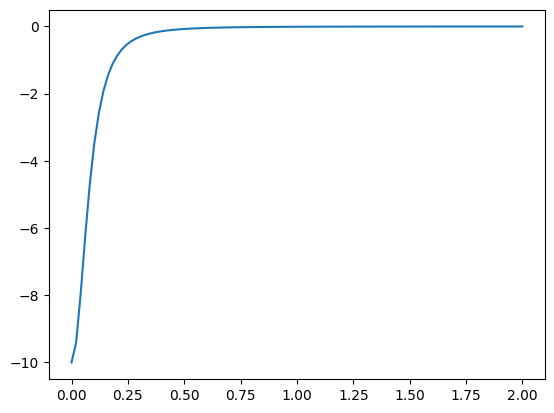

In [ ]:
plt.plot(z, campo_e)

In [ ]:
#vamos a hacer lo mismo anterior, pero de forma vectorizada

derivada = np.vectorize(derivative)            #cualquier funcion la puedo vectorizar

In [ ]:
z= np.linspace(0,2, 100)
#derivada(pot_escalado, z)

In [ ]:
z= np.linspace(0,2, 100)
campo = -derivative(pot_escalado, z, dx = 0.001, args=(R,))
campo

<ipython-input-100-8859fc005026>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  campo = -derivative(pot_escalado, z, dx = 0.001, args=(R,))


array([-9.99950004e+00, -9.41726280e+00, -7.97050055e+00, -6.25468183e+00,
       -4.70549873e+00, -3.48250132e+00, -2.57734754e+00, -1.92477212e+00,
       -1.45679356e+00, -1.11927238e+00, -8.73094752e-01, -6.91069080e-01,
       -5.54518971e-01, -4.50603939e-01, -3.70427850e-01, -3.07758975e-01,
       -2.58176822e-01, -2.18504412e-01, -1.86428506e-01, -1.60243300e-01,
       -1.38675541e-01, -1.20763820e-01, -1.05774235e-01, -9.31407754e-02,
       -8.24226798e-02, -7.32735914e-02, -6.54190100e-02, -5.86396352e-02,
       -5.27589421e-02, -4.76338274e-02, -4.31475050e-02, -3.92040644e-02,
       -3.57242699e-02, -3.26422932e-02, -2.99031532e-02, -2.74606975e-02,
       -2.52759990e-02, -2.33160760e-02, -2.15528636e-02, -1.99623828e-02,
       -1.85240654e-02, -1.72202036e-02, -1.60354975e-02, -1.49566833e-02,
       -1.39722248e-02, -1.30720572e-02, -1.22473736e-02, -1.14904456e-02,
       -1.07944728e-02, -1.01534556e-02, -9.56208769e-03, -9.01566454e-03,
       -8.51000537e-03, -

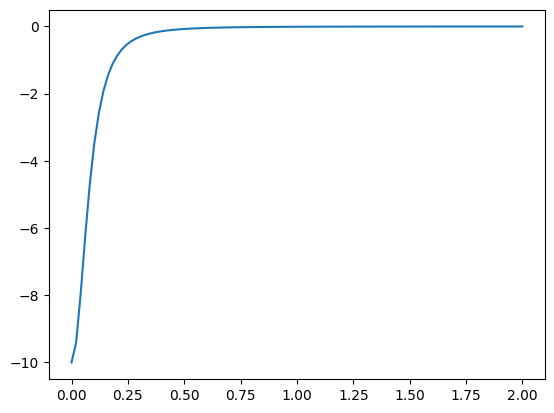

In [ ]:
plt.plot(z, campo)

#segunda parte de la actividad

In [ ]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt

In [ ]:
def potencial(z, R, kq =1):
  V = z * kq/np.sqrt(z**2 + R**2)
  return V

In [ ]:
#para el calculo del campo electrico lo vamos a hacer con misc derivative dentro de scipy

z0=0.1
R= 1E-3

derivative(potencial, 0.1, dx = 1E-3, args=(R,))           

<ipython-input-7-5c183073d834>:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(potencial, 0.1, dx = 1E-3, args=(R,))


0.0010000499736650958

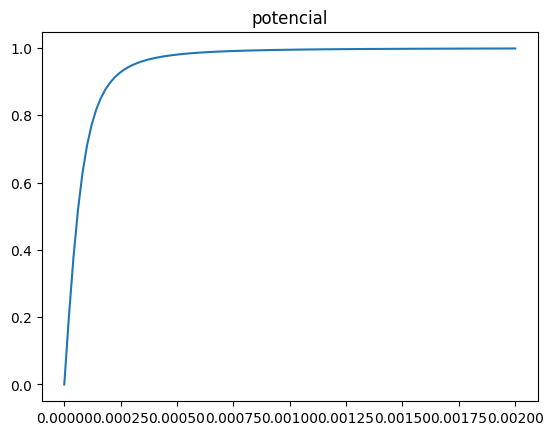

In [ ]:
z = np.linspace(0, 0.002, 100)
z0=0.1
R= 0.1E-3

plt.plot(z, potencial(z, R))
plt.title('potencial');

<ipython-input-17-495dc0cda524>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  gradV= derivative(potencial, z, dx = 1E-6, args=(R,))


Text(0.5, 1.0, 'campo eléctrico')

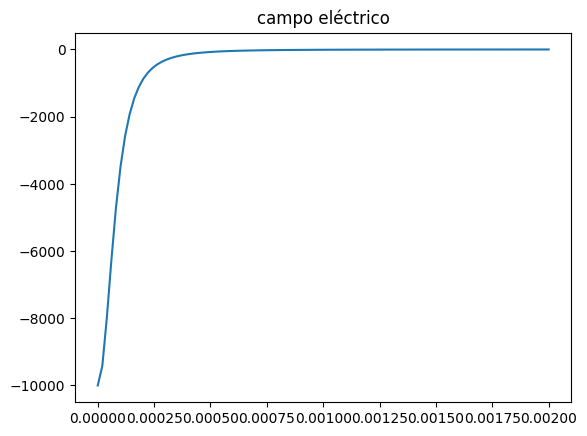

In [ ]:
z = np.linspace(0, 0.002, 100)
z0=0.1
R= 0.1E-3

gradV= derivative(potencial, z, dx = 1E-6, args=(R,))
E = -gradV
plt.plot(z, E)
plt.title('campo eléctrico')

```
def potencial(z, R, kq =1):
  if (z >= 0):
    V = z * kq/np.sqrt(z**2 + R**2)
  else:
    V= 0
  return V

gradV= derivative(potencial, z, dx = 1E-6, args=(R,))
E = -gradV
plt.plot(z, E)
plt.title('campo eléctrico')

#al estar el if, no funcina bien. Se debe vectorizar la funcion misc derivative
```

In [ ]:
#vamos a vectorizar la función derivative

derivative1 = np.vectorize(derivative, excluded = ['args'])

#los args son los parametros adicionales diferentes de z, para que no haga un vector con puros R y kq

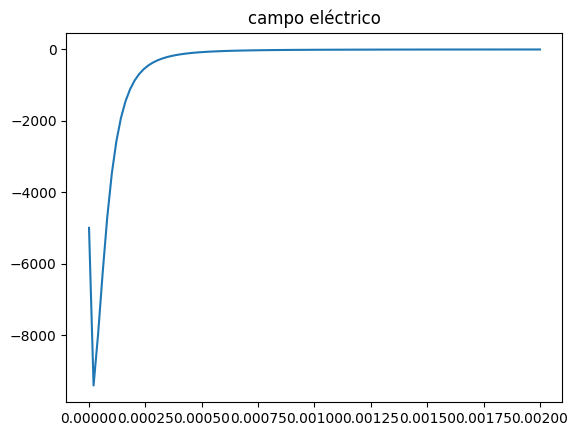

In [ ]:
def potencial(z, R, kq):
  if (z >= 0):
    V = z * kq/np.sqrt(z**2 + R**2)
  else:
    V= 0
  return V

kq = 1
gradV= derivative1(potencial, z, dx = 1E-6, args=(R,kq, ))
E = -gradV
plt.plot(z, E)
plt.title('campo eléctrico');

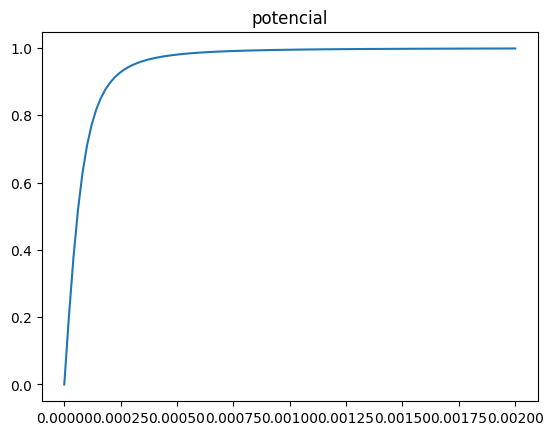

In [ ]:
potencial1 = np.vectorize(potencial, excluded = ['args'])          #si los fueramos a hacer sin vectorizarlo tampoco podríamos
plt.plot(z, potencial1(z, R, kq))
plt.title('potencial');

#anillo
\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

#disco

\begin{equation}
V = \frac{q}{\pi R²}2k \pi (\sqrt{z² + R²} -z)
\end{equation}

In [ ]:
#supongamos que ahora tambien vamos a tener en cuenta el calculo del campo electrico de un disco

def potencial(z, R, kq, select):
  if (select == 'anillo'):
    V = z * kq/np.sqrt(z**2 + R**2)

  elif (select  == 'disco'):
    V= (2*kq / R**2) * (np.sqrt(z**2 + R**2) - z)
  
  else:
    print('la palabra select debe ser un anillo o un disco')
    V = None
    
  return V

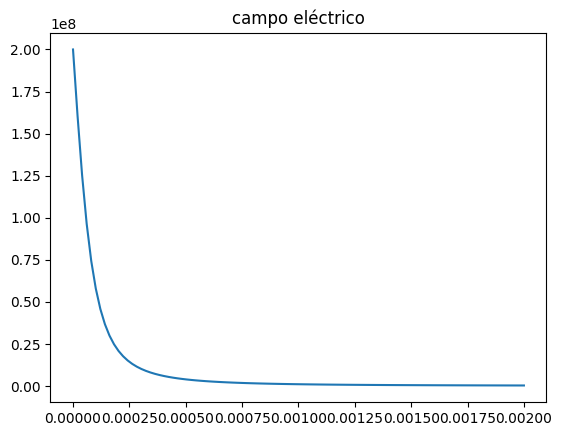

In [ ]:
z = np.linspace(0, 0.002, 100)
R= 0.1E-3
kq =1
select = 'disco'

try:
  gradV= derivative1(potencial, z, dx = 1E-6, args=(R,kq, select, ))
  E = -gradV
except: 
  raise Exception('la palabra select debe ser un anillo o un disco')
  
plt.plot(z, E)
plt.title('campo eléctrico');

#convertir a un archivo con extension.py

In [ ]:
import numpy as np
from scipy.misc import derivative

z = np.linspace(0, 0.002, 100)
R= 0.1E-3
kq =1
select = 'disco'

def potencial(z, R, kq, select):
  if (select == 'anillo'):
    V = z * kq/np.sqrt(z**2 + R**2)

  elif (select  == 'disco'):
    V= (2*kq / R**2) * (np.sqrt(z**2 + R**2) - z)
  
  else:
    print('la palabra select debe ser un anillo o un disco')
    V = None
    
  return V


derivative1 = np.vectorize(derivative, excluded = ['args'])

try:
  gradV= derivative1(potencial, z, dx = 1E-6, args=(R,kq, select, ))
  E = -gradV
  np.savetxt('campo_electrico.txt', E)
except: 
  print('la palabra select debe ser un anillo o un disco')

In [ ]:
!ls

campo_electrico.txt  sample_data
